In [1]:
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=10,5
sns.set_style('darkgrid')

In [2]:
pop=pd.read_csv(r'C:\Users\admin\Downloads\archive\countries_population.csv')

In [3]:
pop

,Country,ISO3,Year,Population,Population Growth,Growth Rate (%),Decade
0,Afghanistan,AFG,1960,8996973,NaN,NaN,1960s
1,Afghanistan,AFG,1961,9169410,172437.0,1.916611,1960s
2,Afghanistan,AFG,1962,9351441,182031.0,1.985199,1960s
3,Afghanistan,AFG,1963,9543205,191764.0,2.050636,1960s
4,Afghanistan,AFG,1964,9744781,201576.0,2.112246,1960s
...,...,...,...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681,236325.0,1.770178,2010s
15405,Zimbabwe,ZWE,2015,13814629,227948.0,1.677731,2010s
15406,Zimbabwe,ZWE,2016,14030390,215761.0,1.561830,2010s
15407,Zimbabwe,ZWE,2017,14236745,206355.0,1.470772,2010s


In [4]:
pop.shape

(15409, 7)

In [5]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15409 entries, 0 to 15408
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            15409 non-null  object 
 1   ISO3               15409 non-null  object 
 2   Year               15409 non-null  int64  
 3   Population         15409 non-null  int64  
 4   Population Growth  15146 non-null  float64
 5   Growth Rate (%)    15146 non-null  float64
 6   Decade             15409 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 842.8+ KB


In [6]:
pop.columns

Index(['Country', 'ISO3', 'Year', 'Population', 'Population Growth',
       'Growth Rate (%)', 'Decade'],
      dtype='object')

In [7]:
pop.isnull().sum()

Country                0
ISO3                   0
Year                   0
Population             0
Population Growth    263
Growth Rate (%)      263
Decade                 0
dtype: int64

In [8]:
len(pop.columns)

7

In [9]:
pop.describe()

,Year,Population,Population Growth,Growth Rate (%)
count,15409.000000,1.540900e+04,1.514600e+04,15146.000000
mean,1989.069764,2.081236e+08,3.297912e+06,1.813048
std,17.031017,6.868312e+08,1.067664e+07,1.632461
min,1960.000000,3.893000e+03,-6.740000e+06,-20.942049
25%,1974.000000,9.268410e+05,6.240500e+03,0.788829
50%,1989.000000,6.418773e+06,8.683650e+04,1.773408
75%,2004.000000,4.244904e+07,6.088282e+05,2.660330
max,2018.000000,7.594270e+09,9.037486e+07,32.392335


In [10]:
pop.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,15409.0,1.989070e+03,1.703102e+01,1.960000e+03,1974.000000,1.989000e+03,2.004000e+03,2.018000e+03
Population,15409.0,2.081236e+08,6.868312e+08,3.893000e+03,926841.000000,6.418773e+06,4.244904e+07,7.594270e+09
Population Growth,15146.0,3.297912e+06,1.067664e+07,-6.740000e+06,6240.500000,8.683650e+04,6.088282e+05,9.037486e+07
Growth Rate (%),15146.0,1.813048e+00,1.632461e+00,-2.094205e+01,0.788829,1.773408e+00,2.660330e+00,3.239233e+01


In [11]:
pop.tail()

,Country,ISO3,Year,Population,Population Growth,Growth Rate (%),Decade
15404,Zimbabwe,ZWE,2014,13586681,236325.0,1.770178,2010s
15405,Zimbabwe,ZWE,2015,13814629,227948.0,1.677731,2010s
15406,Zimbabwe,ZWE,2016,14030390,215761.0,1.561830,2010s
15407,Zimbabwe,ZWE,2017,14236745,206355.0,1.470772,2010s
15408,Zimbabwe,ZWE,2018,14439018,202273.0,1.420781,2010s


In [12]:
pop.columns=['Country', 'ISO3', 'Year', 'Population', 'Population_Growth','Growth_Rate', 'Decade']

In [13]:
pop['Decade']=pop['Decade'].str.extract('(\d+)') # d+ means Didit

In [14]:
pop.head()

,Country,ISO3,Year,Population,Population_Growth,Growth_Rate,Decade
0,Afghanistan,AFG,1960,8996973,NaN,NaN,1960
1,Afghanistan,AFG,1961,9169410,172437.0,1.916611,1960
2,Afghanistan,AFG,1962,9351441,182031.0,1.985199,1960
3,Afghanistan,AFG,1963,9543205,191764.0,2.050636,1960
4,Afghanistan,AFG,1964,9744781,201576.0,2.112246,1960


In [15]:
pop['Population_Growth']=pop['Population_Growth'].fillna(np.mean(pd.to_numeric(pop['Population_Growth'])))
pop['Growth_Rate']=pop['Growth_Rate'].fillna(np.mean(pd.to_numeric(pop['Growth_Rate'])))

In [16]:
pop.isnull().sum()

Country              0
ISO3                 0
Year                 0
Population           0
Population_Growth    0
Growth_Rate          0
Decade               0
dtype: int64

In [17]:
pop.dtypes

Country               object
ISO3                  object
Year                   int64
Population             int64
Population_Growth    float64
Growth_Rate          float64
Decade                object
dtype: object

In [18]:
pop.head()

,Country,ISO3,Year,Population,Population_Growth,Growth_Rate,Decade
0,Afghanistan,AFG,1960,8996973,3.297912e+06,1.813048,1960
1,Afghanistan,AFG,1961,9169410,1.724370e+05,1.916611,1960
2,Afghanistan,AFG,1962,9351441,1.820310e+05,1.985199,1960
3,Afghanistan,AFG,1963,9543205,1.917640e+05,2.050636,1960
4,Afghanistan,AFG,1964,9744781,2.015760e+05,2.112246,1960


<Axes: xlabel='Year', ylabel='Density'>

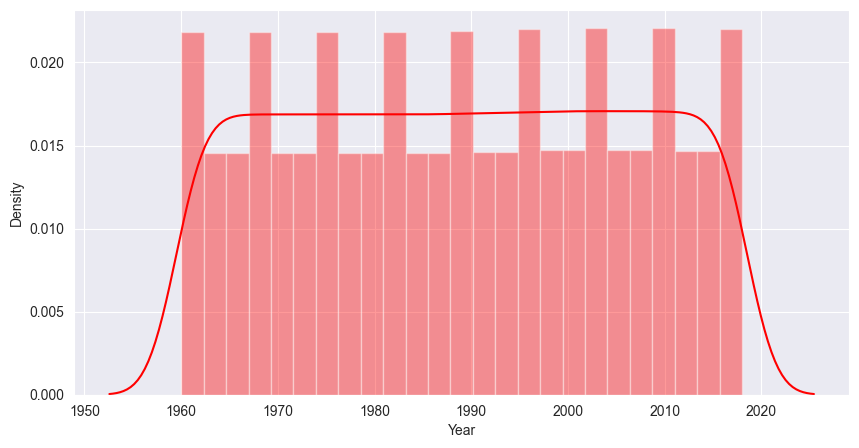

In [19]:
sns.distplot(pop.Year,color='r')

<Axes: xlabel='Population', ylabel='Density'>

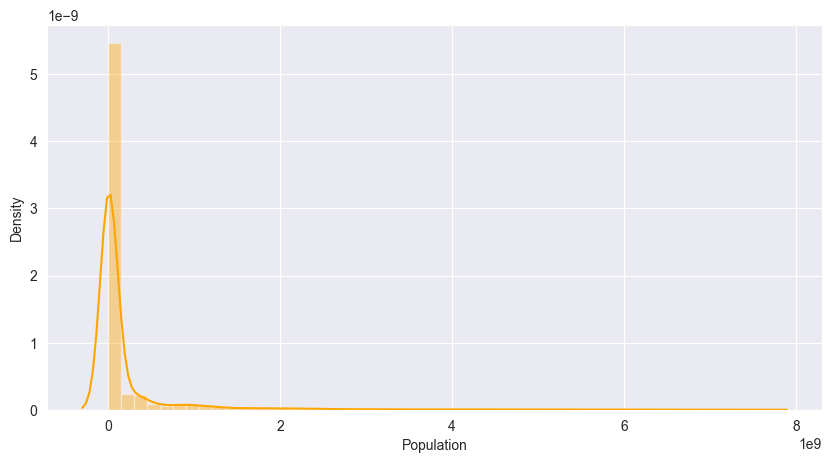

In [20]:
sns.distplot(pop.Population,color='Orange')

<Axes: xlabel='Population_Growth', ylabel='Density'>

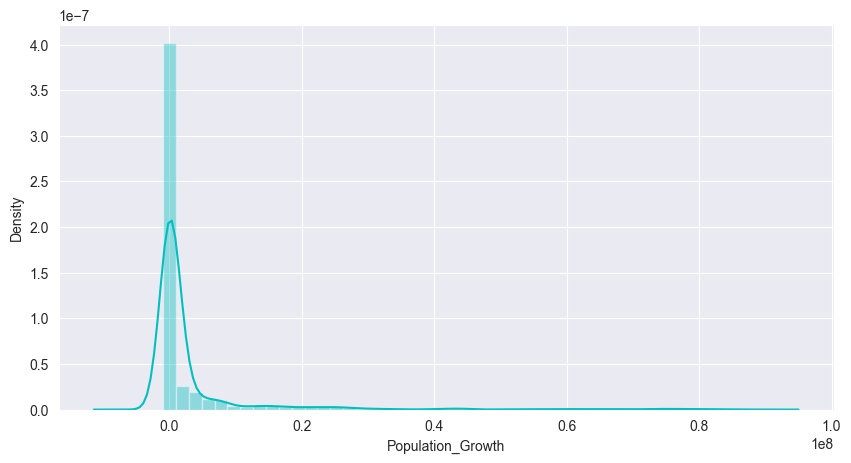

In [21]:
sns.distplot(pop.Population_Growth,color='c')

<Axes: xlabel='Growth_Rate', ylabel='Density'>

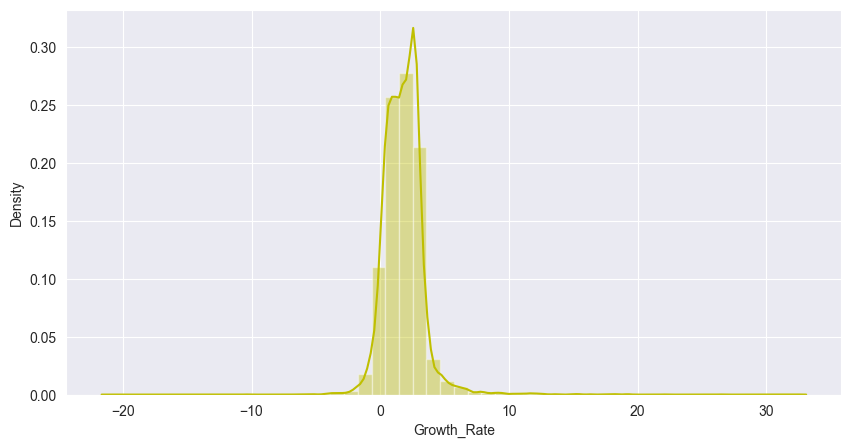

In [22]:
sns.distplot(pop.Growth_Rate,color='y')

<Axes: xlabel='Decade', ylabel='Density'>

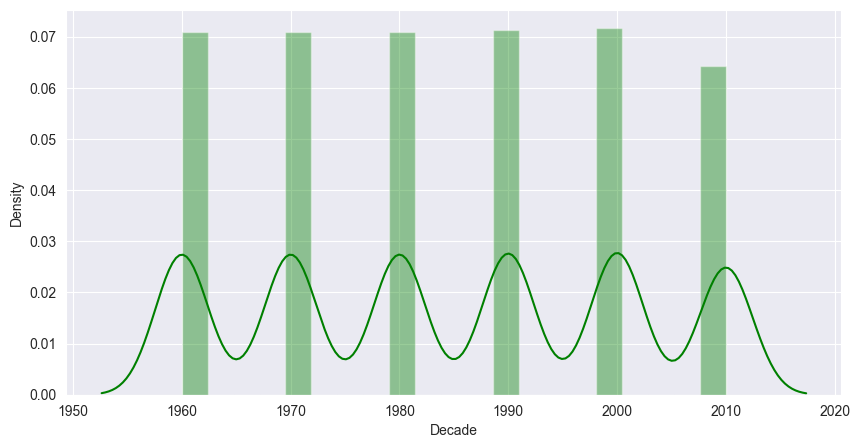

In [23]:
sns.distplot(pop.Decade,color='g')

In [24]:
pop.head()

,Country,ISO3,Year,Population,Population_Growth,Growth_Rate,Decade
0,Afghanistan,AFG,1960,8996973,3.297912e+06,1.813048,1960
1,Afghanistan,AFG,1961,9169410,1.724370e+05,1.916611,1960
2,Afghanistan,AFG,1962,9351441,1.820310e+05,1.985199,1960
3,Afghanistan,AFG,1963,9543205,1.917640e+05,2.050636,1960
4,Afghanistan,AFG,1964,9744781,2.015760e+05,2.112246,1960


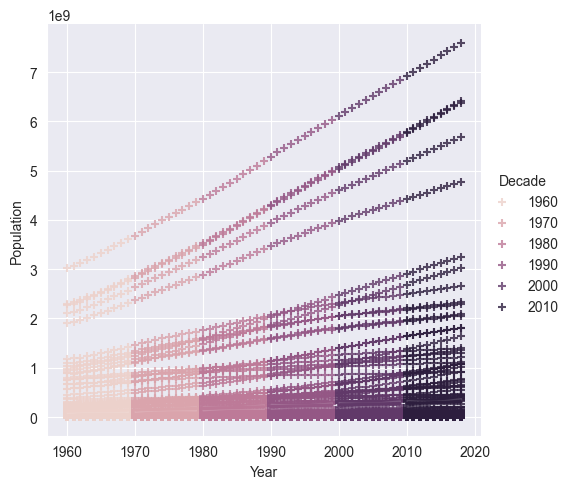

In [25]:
sns.lmplot(data=pop,x='Year',y='Population',markers='+',hue='Decade',palette='ch:45')

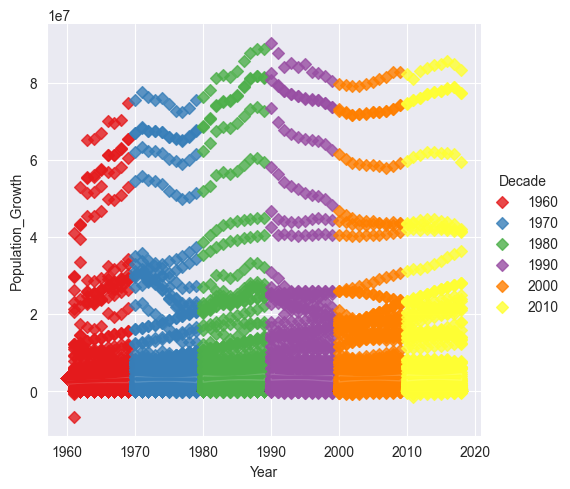

In [26]:
sns.lmplot(data=pop,x='Year',y='Population_Growth',markers='D',hue='Decade',palette='Set1')

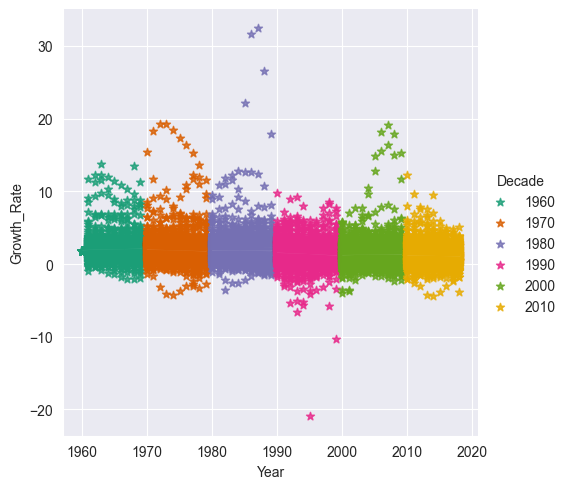

In [27]:
sns.lmplot(data=pop,x='Year',y='Growth_Rate',markers='*',hue='Decade',palette='Dark2')

In [28]:
pop.head()

,Country,ISO3,Year,Population,Population_Growth,Growth_Rate,Decade
0,Afghanistan,AFG,1960,8996973,3.297912e+06,1.813048,1960
1,Afghanistan,AFG,1961,9169410,1.724370e+05,1.916611,1960
2,Afghanistan,AFG,1962,9351441,1.820310e+05,1.985199,1960
3,Afghanistan,AFG,1963,9543205,1.917640e+05,2.050636,1960
4,Afghanistan,AFG,1964,9744781,2.015760e+05,2.112246,1960


<Axes: xlabel='Decade', ylabel='count'>

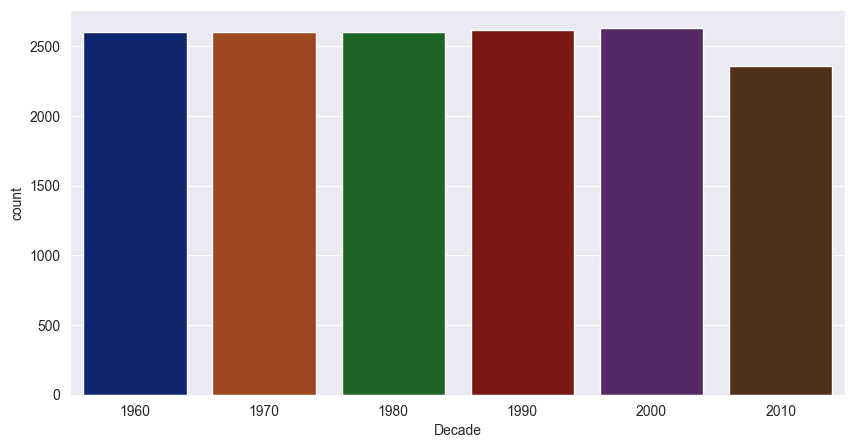

In [29]:
sns.countplot(data=pop,x='Decade',palette='dark')

<Axes: xlabel='Year', ylabel='Density'>

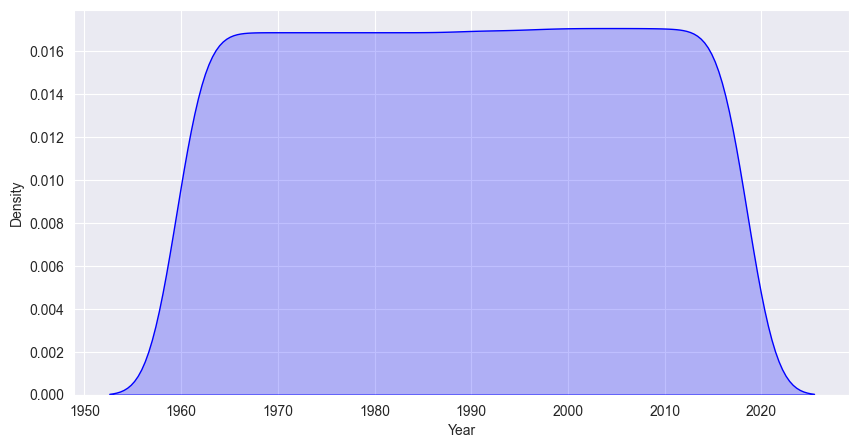

In [30]:
sns.kdeplot(pop.Year,color='b',fill=True)

<Axes: xlabel='Population', ylabel='Density'>

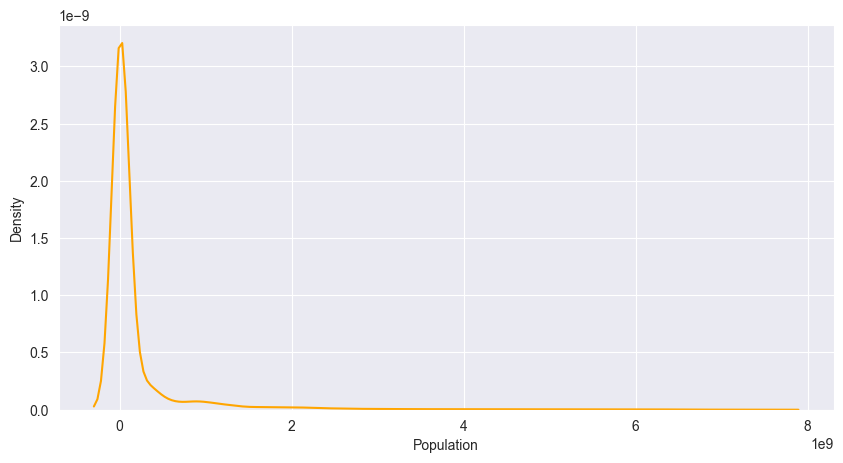

In [31]:
sns.kdeplot(pop.Population,color='Orange')

<Axes: xlabel='Population_Growth', ylabel='Density'>

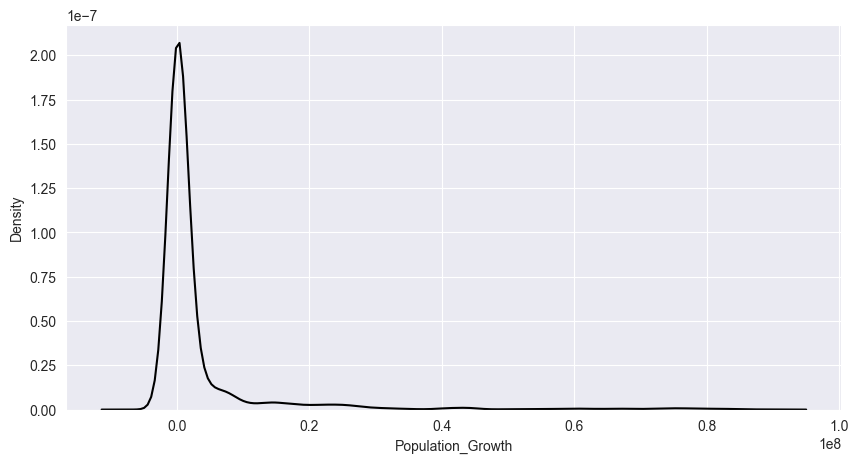

In [32]:
sns.kdeplot(pop.Population_Growth,color='k')

<Axes: xlabel='Growth_Rate', ylabel='Density'>

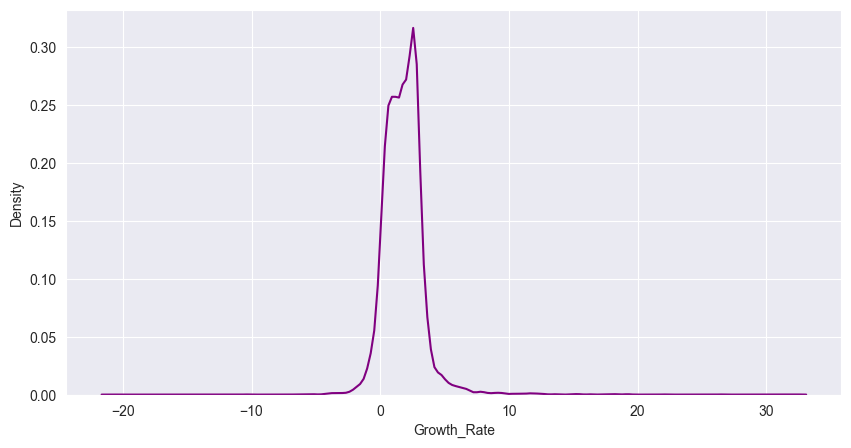

In [33]:
sns.kdeplot(pop.Growth_Rate,color='Purple')

In [34]:
pop.head()

,Country,ISO3,Year,Population,Population_Growth,Growth_Rate,Decade
0,Afghanistan,AFG,1960,8996973,3.297912e+06,1.813048,1960
1,Afghanistan,AFG,1961,9169410,1.724370e+05,1.916611,1960
2,Afghanistan,AFG,1962,9351441,1.820310e+05,1.985199,1960
3,Afghanistan,AFG,1963,9543205,1.917640e+05,2.050636,1960
4,Afghanistan,AFG,1964,9744781,2.015760e+05,2.112246,1960


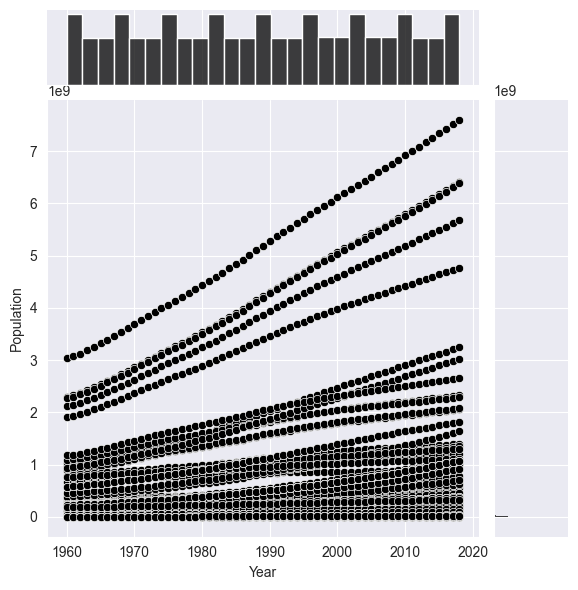

In [35]:
sns.jointplot(data=pop,x='Year',y='Population',color='k')

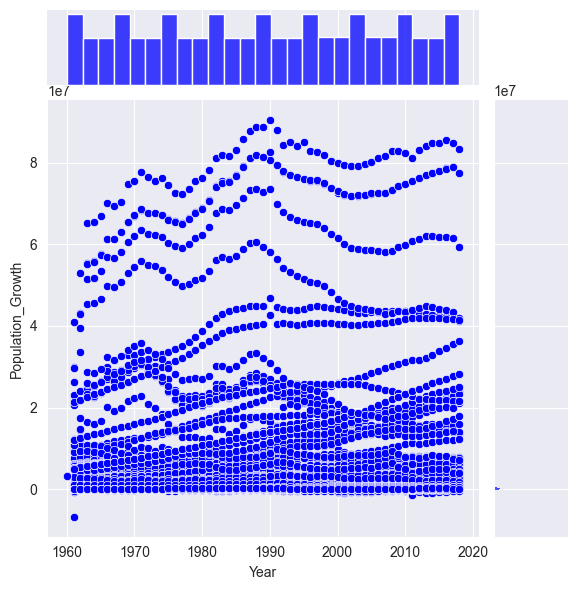

In [36]:
sns.jointplot(data=pop,x='Year',y='Population_Growth',color='b')

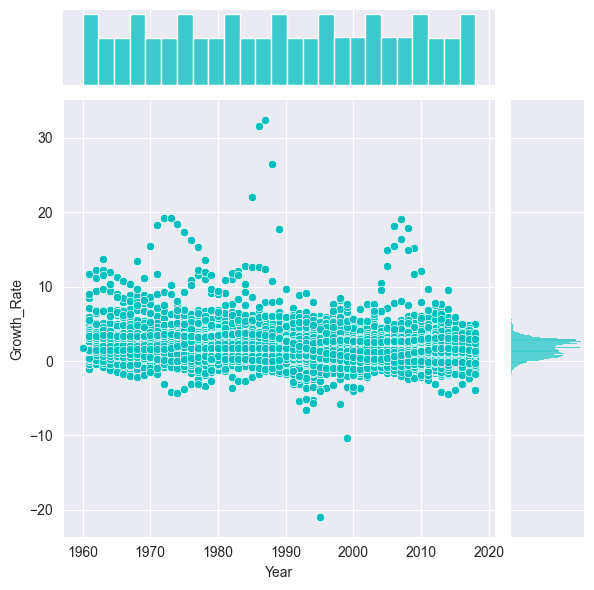

In [37]:
sns.jointplot(data=pop,x='Year',y='Growth_Rate',color='c')

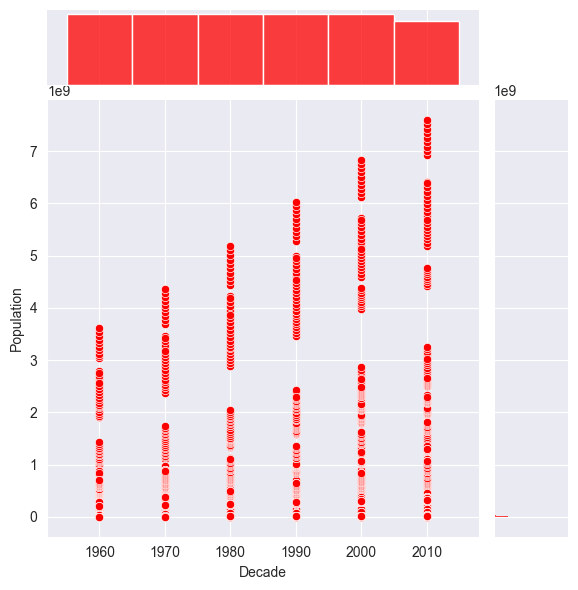

In [38]:
sns.jointplot(data=pop,x='Decade',y='Population',color='r')

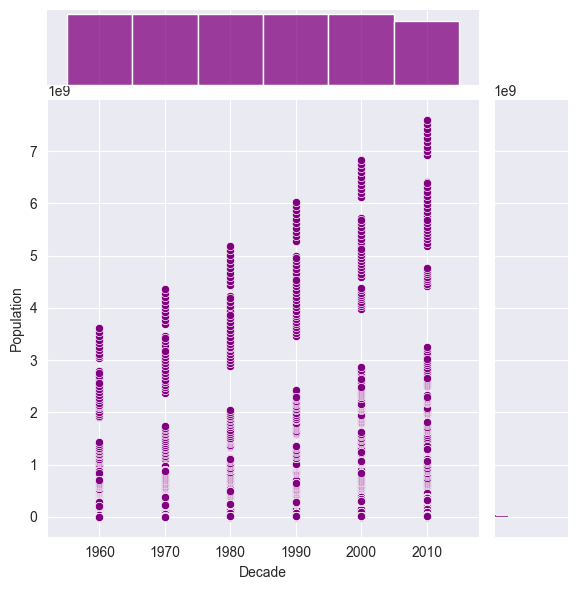

In [39]:
sns.jointplot(data=pop,x='Decade',y='Population',color='Purple')